# Life Expectancy and GDP

`Goal:` Create visualizations of a relationship between life expectancy and GDP, and proof that there is a association between those two variables.

`Questions to Answer:`
1. Has life expectancy increased over time in the six nations?
2. Has GDP increased over time in the six nations?
3. Is there a correlation between GDP and life expectancy of a country?
4. What is the average life expectancy in these nations?
5. What is the distribution of that life expectancy?

In [11]:
# Importing the most important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing and getting familiar with the dataset
gdp_data = pd.read_csv('GDP_all_data.csv')
print(gdp_data.head(), '\n')
print(gdp_data.info(), '\n')
print(gdp_data.describe(include='all'), '\n')
gdp_data['Country'] = gdp_data.Country.astype('string')
gdp_data = gdp_data.rename(columns={'Life expectancy at birth (years)':'Life_expectancy_at_birth'})
gdp_data['Country'] = gdp_data.Country.replace('United States of America', 'USA')

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None 

       Country         Year  Life expectancy at birth (years)    

In [12]:
# What countries are in this dataset?
countries = gdp_data.Country.unique()
print(countries)

<StringArray>
['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe']
Length: 6, dtype: string


In [13]:
# What years do we have data on
years = gdp_data.Year.unique()
print(years)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


### #1. Has life expectancy increased over time in the six nations?

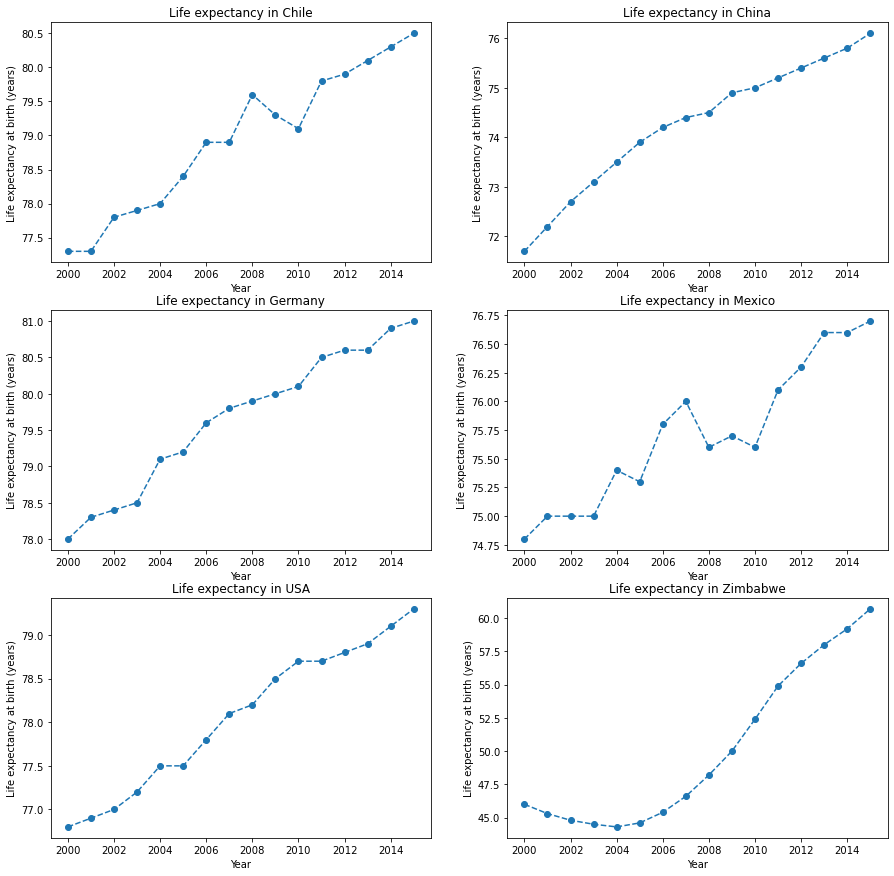

<Figure size 432x288 with 0 Axes>

In [14]:
# In the loop going through every country and then making simple plot
plt.figure(figsize=(15, 15))
i = 1
for country in countries:
    data = gdp_data[gdp_data.Country == country]
    plt.subplot(3, 2, i)
    plt.plot(data['Year'], data['Life_expectancy_at_birth'], linestyle='--', marker='o')
    plt.xlabel('Year')
    plt.ylabel('Life expectancy at birth (years)')
    plt.title('Life expectancy in ' + country)
    i += 1
plt.show()
plt.clf()

### #2. Has GDP increased over time in the six nations?

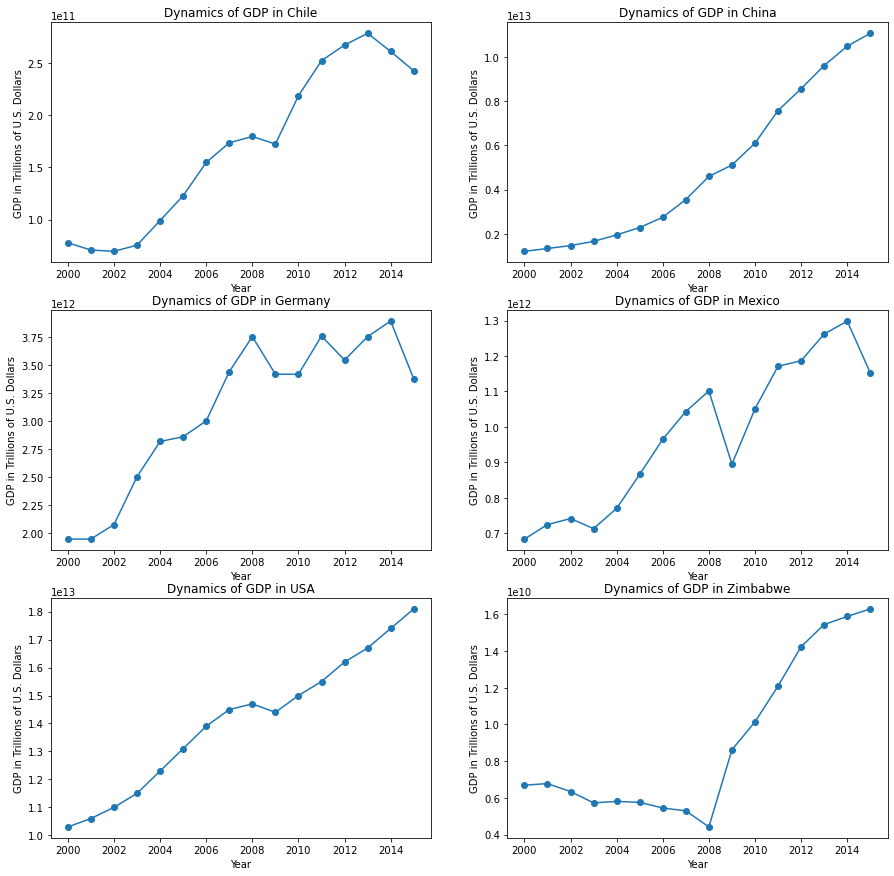

<Figure size 432x288 with 0 Axes>

In [15]:
# In the loop going through every country and then making simple plot
plt.figure(figsize=(15, 15))
i = 1
for country in countries:
    data = gdp_data[gdp_data.Country == country]
    plt.subplot(3, 2, i)
    plt.plot(data['Year'], data['GDP'], marker='o')
    plt.xlabel('Year')
    plt.ylabel("GDP in Trillions of U.S. Dollars")
    plt.title('Dynamics of GDP in ' + country)
    i += 1
plt.show()
plt.clf()

### #3. Is there a correlation between GDP and life expectancy of a country?

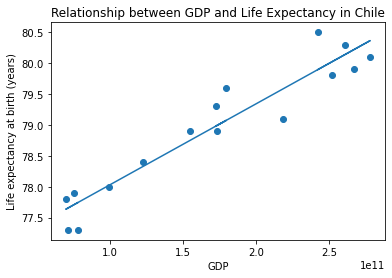

0.9498766659254416


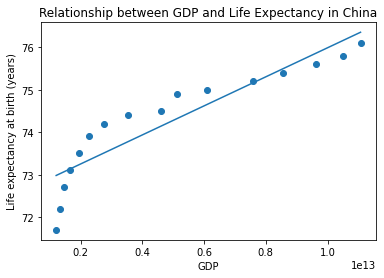

0.9085255408648358


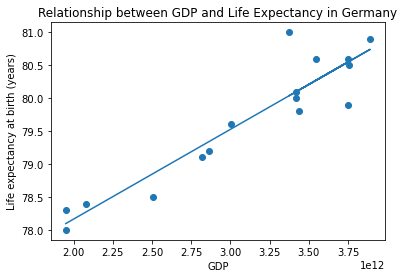

0.9326988982561268


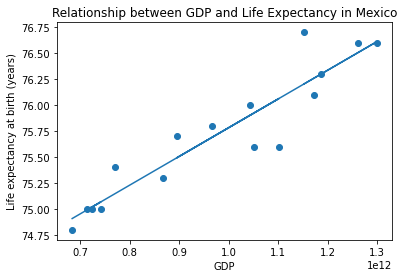

0.9322377167847081


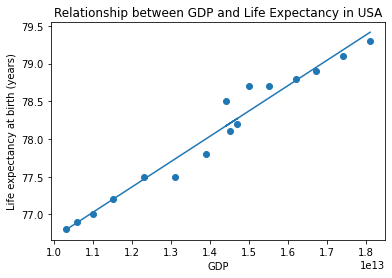

0.9817092382430257


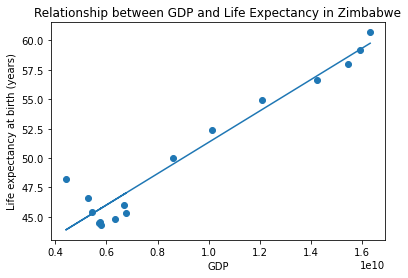

0.9661998955858777


<Figure size 432x288 with 0 Axes>

In [16]:
# Importing library for Linear Regression
from sklearn.linear_model import LinearRegression
import scipy.stats as stats


for country in countries:
    data = gdp_data[gdp_data.Country == country]
    X = np.array(data['GDP']).reshape(-1,1)
    
    # Creating a Linear Regression model
    model = LinearRegression()
    model.fit(X, data['Life_expectancy_at_birth'])
    y = model.coef_[0] * data['GDP'] + model.intercept_
    
    # Making scatter plot for each country
    plt.scatter(data['GDP'], data['Life_expectancy_at_birth'])
    plt.plot(data['GDP'], y)
    plt.xlabel('GDP')
    plt.ylabel('Life expectancy at birth (years)')
    plt.title('Relationship between GDP and Life Expectancy in ' + country)
    plt.show()
    plt.clf()

    # Finding and printing Pearson's Correlation Coefficient
    corr, p = stats.pearsonr(data['GDP'], data['Life_expectancy_at_birth'])
    print(corr)

### #4. What is the average life expectancy in these nations?

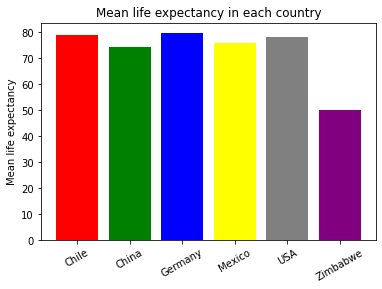

[('Chile', 78.94374999999998), ('China', 74.26249999999999), ('Germany', 79.65625), ('Mexico', 75.71875), ('USA', 78.0625), ('Zimbabwe', 50.09375000000001)]


In [17]:
# Finding mean life expectancy in every country, and plotting them on the bar chart
mean_life_expectancy = []
for country in countries:
    data = gdp_data[gdp_data.Country == country]
    mean_life_expectancy.append(data['Life_expectancy_at_birth'].mean())

plt.bar(countries, mean_life_expectancy, color=['red', 'green', 'blue', 'yellow', 'grey', 'purple'])
plt.xticks(rotation=30)
plt.ylabel('Mean life expectancy')
plt.title('Mean life expectancy in each country')
plt.show()

print(list(zip(countries, mean_life_expectancy)))

### #5. What is the distribution of that life expectancy?

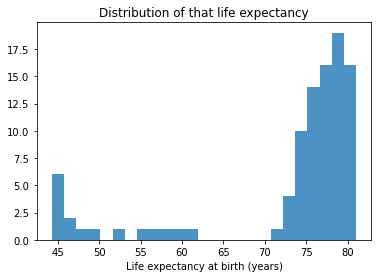

In [18]:
plt.hist(gdp_data['Life_expectancy_at_birth'], bins=25, alpha=0.8)
plt.xlabel('Life expectancy at birth (years)')
plt.title('Distribution of that life expectancy')
plt.show()

## `Conclusion`

#### #1. Has life expectancy increased over time in the six nations?

Yes, during the period from 2000 to 2014 life expectancy in all 6 countries increased.

#### #2. Has GDP increased over time in the six nations?

Yes. GDP in 2014 increased in all countries comparing to the levels of 2000. But in such states as Chile, Germany and Mexico we can see that during 2013 and 2014 GDP had a tendency to decrease, and maybe tendency will continue on 2015 year.

#### #3. Is there a correlation between GDP and life expectancy of a country?

All countries have a strong positive correlation between GDP and life expectancy, because correlation coefficient in all countries is above 0.90

#### #4. What is the average life expectancy in these nations?

Five out of six countries have an average life expectancy higher than 73 years old, and only Zimbabwe have average at 50 years old.

#### #5. What is the distribution of that life expectancy?

Data of life expectancy have a left-skewed distribution, mainly because of the outliers from Zimbabwe. But most of the data distributed in a range between approximately 71 and 81 years old.